#Read the dataset from file

In [10]:
import pandas as pd


file_path = "numDataset.csv"
df = pd.read_csv(file_path)
df.head()

,ID,Group,Gender,Age,Education,VIQ,PIQ,WMS_DMI,HRSD,DHD,...,pics_RT_erotic_good,pics_RT_erotic_neut,pics_RT_gross_bad,pics_RT_gross_good,pics_RT_gross_neut,Limbic Structures,caudalmiddlefrontal1,caudalmiddlefrontal2,superiorfrontal,inferiorparietal
0,1001,1,1,77,14.0,121,107,103,0,11,...,1337.484333,2326.300000,1640.011697,NaN,2198.95,0.05962,-0.18178,-0.27689,-0.15485,-0.03134
1,1002,1,1,64,12.0,102,83,93,2,17,...,1074.518333,NaN,1400.009303,1598.4,1944.15,0.13965,-0.02949,0.05429,0.12451,0.19575
2,1003,1,1,45,14.0,115,99,86,0,10,...,1754.288889,1429.853667,773.643333,NaN,NaN,0.08854,0.03802,-0.06013,0.00303,0.26693
3,1004,1,1,55,14.0,123,104,98,10,20,...,1080.423333,NaN,1232.084000,NaN,2124.20,0.10507,0.01622,0.10241,0.22283,-0.00629
4,1005,1,1,59,12.0,96,81,87,15,21,...,1160.066667,NaN,1335.334091,NaN,2701.00,-0.06561,-0.32016,-0.27864,-0.10223,-0.19789


# Handle missing milles, and fill it with mean value

In [11]:
from scipy.stats import zscore

# I had string values in Group and Gender tables, but I forgot, that I can change them using pandas, so I changed them using excel.
# Group: (Alcoholic - 1, Non-alcoholic - 0); 
# Gender: (Man - 1; Woman - 0)
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             88 non-null     int64  
 1   Group                          88 non-null     int64  
 2   Gender                         88 non-null     int64  
 3   Age                            88 non-null     int64  
 4   Education                      88 non-null     float64
 5   VIQ                            88 non-null     int64  
 6   PIQ                            88 non-null     int64  
 7   WMS_DMI                        88 non-null     int64  
 8   HRSD                           88 non-null     int64  
 9   DHD                            88 non-null     int64  
 10  DD                             88 non-null     float64
 11  LOS                            88 non-null     float64
 12  FSIQ                           88 non-null     int64

## Check if data normally distributed

(array([0.292813  , 0.06230064, 0.03115032, 0.03738038, 0.03738038,
        0.01869019, 0.02492026, 0.        , 0.        , 0.        ,
        0.01246013, 0.        , 0.00623006, 0.00623006, 0.        ,
        0.01246013, 0.        , 0.        , 0.        , 0.00623006]),
 array([ 0.   ,  1.824,  3.648,  5.472,  7.296,  9.12 , 10.944, 12.768,
        14.592, 16.416, 18.24 , 20.064, 21.888, 23.712, 25.536, 27.36 ,
        29.184, 31.008, 32.832, 34.656, 36.48 ]),
 <BarContainer object of 20 artists>)

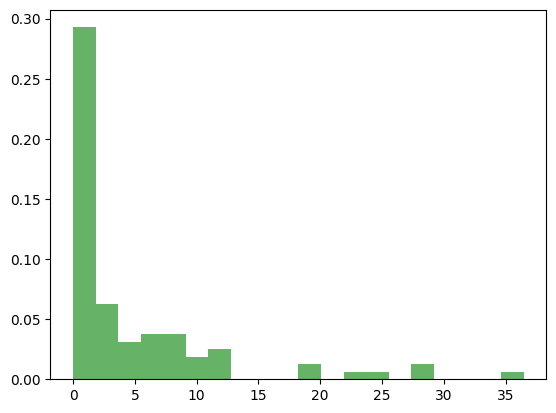

In [12]:
import matplotlib.pyplot as plt

plt.hist(df['DD'], bins=20, density=True, alpha=0.6, color='g')

## It is not, so to test hypothesis, we will use non-parametric Mann-Whitney U test

# 1
### H0: The alcohol consumption affects men and women differently
### H1: The alcohol consumption doesn't affect men and women differently


In [28]:
from scipy.stats import mannwhitneyu


# DD = daily drinks, as it is written in the documentation
male_data = df[df['Gender'] == 1]['DD']
female_data = df[df['Gender'] == 0]['DD']

# Kolmogorov-Smirnov test
statistic, p_value = mannwhitneyu(male_data, female_data)

alpha = 0.05
print('p_value', p_value)
if p_value < alpha:
    print("Reject the null hypothesis: The alcohol consumption affects men and women differently.")
else:
    print("Fail to reject the null hypothesis: The alcohol consumption doesn't affect men and women differently.")

p_value 0.2082372456976419
Fail to reject the null hypothesis: The alcohol consumption doesn't affect men and women differently.


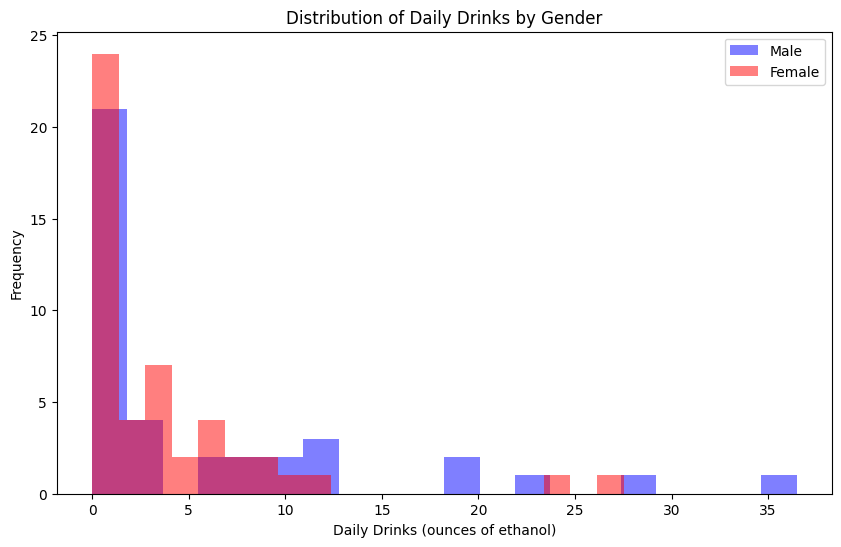

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(male_data, bins=20, alpha=0.5, color='blue', label='Male')
plt.hist(female_data, bins=20, alpha=0.5, color='red', label='Female')
plt.xlabel('Daily Drinks (ounces of ethanol)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Drinks by Gender')
plt.legend()
plt.show()

# 2
### H0: The intellegence level affect alcohol consumption
### H1: The intellegence level does not affect alcohol consumption


Correlation analysis between VIQ and daily drink variables:
VIQ vs DD: Correlation = -0.0426, p-value = 0.6937
For VIQ: Fail to reject the null hypothesis: There is no significant correlation between alcohol consumption and VIQ.

Correlation analysis between PIQ and daily drink variables:
PIQ vs DD: Correlation = -0.1251, p-value = 0.2457
For PIQ: Fail to reject the null hypothesis: There is no significant correlation between alcohol consumption and PIQ.

Correlation analysis between FSIQ and daily drink variables:
FSIQ vs DD: Correlation = -0.0847, p-value = 0.4325
For FSIQ: Fail to reject the null hypothesis: There is no significant correlation between alcohol consumption and FSIQ.


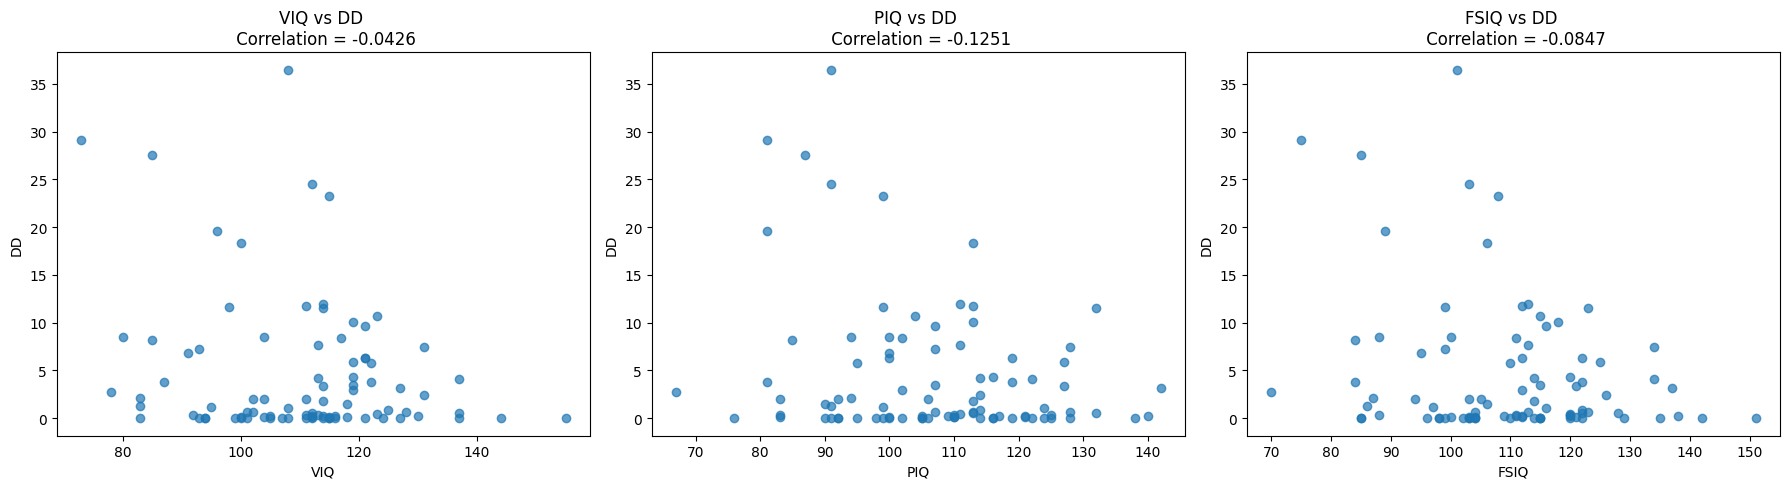

In [31]:
from scipy.stats import spearmanr


# VIQ: Verbal Intelligence Quotient from Wechsler Adult Intelligence Scale
# PIQ: Performance Intelligence Quotient from Wechsler Adult Intelligence Scale
# FSIQ: Full Scale Intelligence Quotient from Wechsler Adult Intelligence Scale
intelligence_vars = ['VIQ', 'PIQ', 'FSIQ']
alcohol_var = 'DD'

fig, axes = plt.subplots(1, len(intelligence_vars), figsize=(18, 5))

# get analysis data frame from intelligence columns and daily drink column
analysis_df = df[intelligence_vars + [alcohol_var]]
i = 0

# check each intelligence columns and perform correlation analysis with alcohol column
for intel_var in intelligence_vars:
    print(f"\nCorrelation analysis between {intel_var} and daily drink variables:")
    correlation, p_value = spearmanr(analysis_df[intel_var], analysis_df[alcohol_var])
    print(f"{intel_var} vs {alcohol_var}: Correlation = {correlation:.4f}, p-value = {p_value:.4f}")

    alpha = 0.05

    if p_value < alpha:
        print(f"For {intel_var}: Reject the null hypothesis: There is a significant correlation between alcohol consumption and {intel_var}.")
    else:
        print(f"For {intel_var}: Fail to reject the null hypothesis: There is no significant correlation between alcohol consumption and {intel_var}.")


    axes[i].scatter(analysis_df[intel_var], analysis_df[alcohol_var], alpha=0.7)
    axes[i].set_title(f'{intel_var} vs {alcohol_var} \n Correlation = {correlation:.4f}')
    axes[i].set_xlabel(intel_var)
    axes[i].set_ylabel(alcohol_var)

    i += 1

plt.tight_layout()
plt.show()

# 3
### H0: Alcohol can cause depression
### H1: Alcohol can't cause depression

For Dep: Reject the null hypothesis: There is a significant correlation between alcohol consumption and Dep.
Correlation coefficient: 0.3835896283259928
P-value: 0.0002250369434532152

For HRSD: Reject the null hypothesis: There is a significant correlation between alcohol consumption and HRSD.
Correlation coefficient: 0.3024777027484563
P-value: 0.004178763687124206

For D: Fail to reject the null hypothesis: There is no significant correlation between alcohol consumption and D.
Correlation coefficient: 0.08688009210223593
P-value: 0.420890184544614



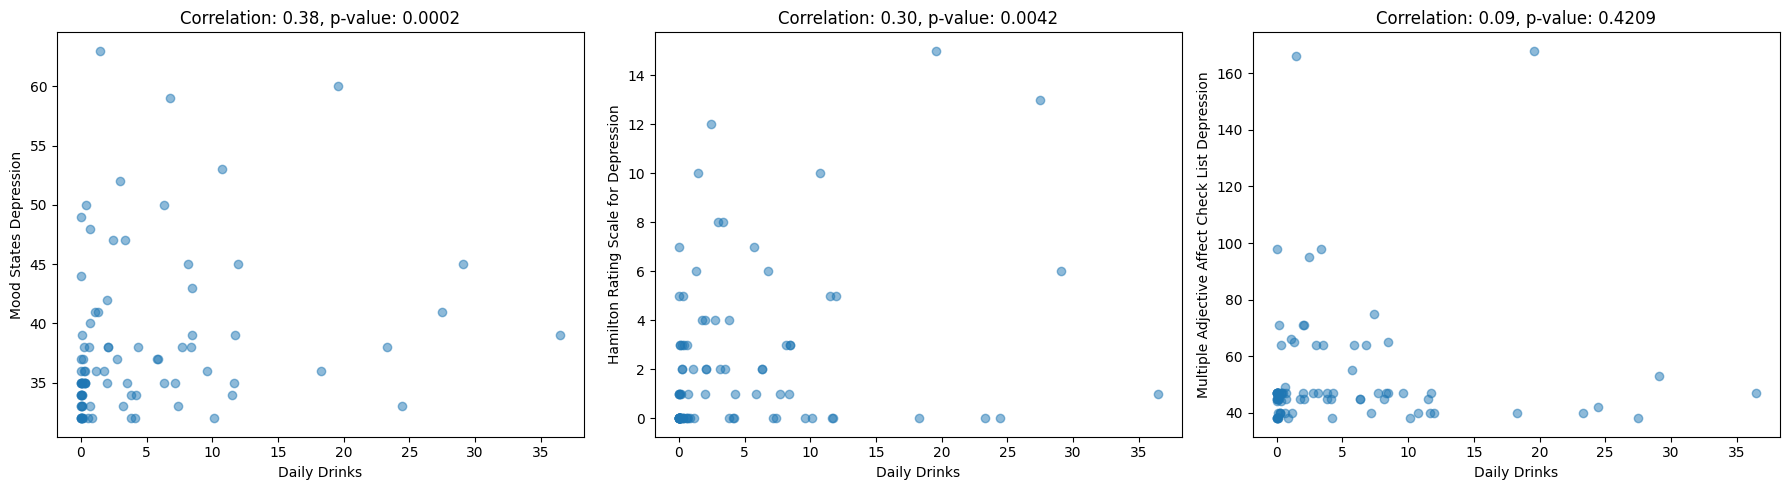

In [16]:
from scipy.stats import spearmanr


# Dep: Profile of Mood States Depression
# HRSD: Hamilton Rating Scale for Depression
# D: Multiple Adjective Affect Check List Depression

depression_vars = ['Dep', 'HRSD', 'D']
alcohol_value = df['DD']
features_names = ['Mood States Depression', 'Hamilton Rating Scale for Depression', 'Multiple Adjective Affect Check List Depression']

fig, axes = plt.subplots(1, len(depression_vars), figsize=(18, 5))
i = 0

for depression_var in depression_vars:
    depression_values = df[depression_var]

    correlation, p_value = spearmanr(alcohol_value, depression_values)
    alpha = 0.05

    if p_value < alpha:
        print(f"For {depression_var}: Reject the null hypothesis: There is a significant correlation between alcohol consumption and {depression_var}.")
    else:
        print(f"For {depression_var}: Fail to reject the null hypothesis: There is no significant correlation between alcohol consumption and {depression_var}.")

    print(f"Correlation coefficient: {correlation}")
    print(f"P-value: {p_value}\n")

    axes[i].scatter(alcohol_value, depression_values, alpha=0.5)
    axes[i].set_xlabel('Daily Drinks')
    axes[i].set_ylabel(features_names[i])
    axes[i].set_title(f'Correlation: {correlation:.2f}, p-value: {p_value:.4f}')

    i += 1

plt.tight_layout()
plt.show()